# Logistic Regression Model to show the relationship between students SAT scores and them being Admitted [yes,No]

Assumptions of this regression model 
Linearity,No outliers, independence,No endogeneity,No auto correlation,No multi-collinearity and Normality and homoscedasticity
Logistic regression is senstive to outliers ,the data should not contain any outlier
This logistic curve can be interpreted as the probability associated with each outcome across independent variable values.
Logistic regression assumes that the relationship between the natural log of these probabilities (when expressed as odds) and your predictor variable is linear.
Each data observation (data points)should be independent ,this means no value depends on each other

# When to use Logistic regression model

You want to use one variable in a prediction of another, or you want to quantify the numerical relationship between two variables
The variable you want to predict (your dependent variable) is binary
You have one independent variable, or one variable that you are using as a predictor

## Import relevant libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

## Load the data file

In [44]:
dataf=pd.read_csv('C:/Users/beemu/Downloads/Compressed/2.2. Simple logistic regression example_2/2.01. Admittance.csv')


In [45]:
data=dataf.copy()
data['Admitted']=data['Admitted'].map({'Yes':1,'No':0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


# Declare the dependent and independent variables

In [46]:
y=data['Admitted']
x1=data['SAT']

# Plotting the data

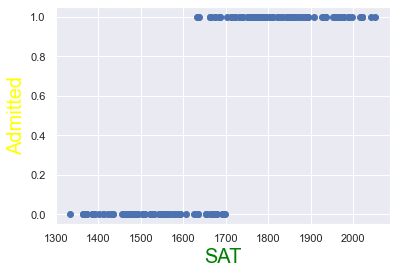

In [47]:
plt.scatter(x1,y,color='C0')
plt.xlabel('SAT',fontsize=20,color='green')
plt.ylabel('Admitted',fontsize=20,color='yellow')
plt.show()

# Plot with regression line

C:\Users\beemu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


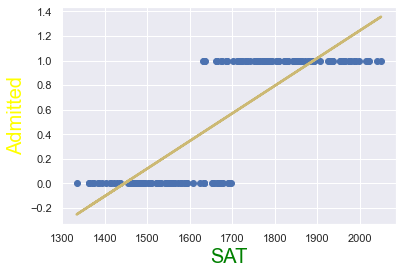

In [48]:
# Creating a linear regresion oon the data will enable me to estimate the coefficients aand be able to plot a regression line
#the data has non linearity so the linear reghression does not make sense
x=sm.add_constant(x1)
reg_lin=sm.OLS(y,x)
# i segment it into regression and fitted regression (results) as i can use the results as an object for some operations
results_lin=reg_lin.fit()

# Creating a scatter plot

plt.scatter(x1,y,color='C0')

y_hat=x1*results_lin.params[1]+results_lin.params[0]
plt.plot(x1,y_hat,lw=2.5,color='C8')
plt.xlabel('SAT',fontsize=20,color='green')
plt.ylabel('Admitted',fontsize=20,color='yellow')
plt.show()

## Plot with a logistic regression model

# Regression

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


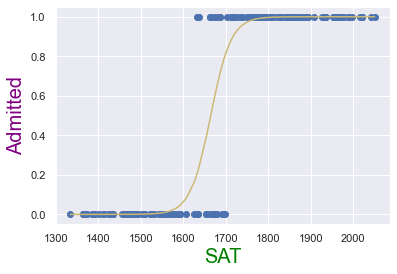

In [49]:
#Created a logit regression
reg_log=sm.Logit(y,x)
#Fitting the regression
results_log=reg_log.fit()

#Creating a logit function depending on the input and coefficients
def  f(x,b0,b1):
    return np.array(np.exp(b0+x*b1)/(1+np.exp(b0+x*b1)))

#sorting the yand x ,so we can plot the curve
f_sorted=np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted=np.sort(np.array(x1))

plt.scatter(x1,y,color='C0')
plt.xlabel('SAT',fontsize=20,color='green')
plt.ylabel('Admitted',fontsize=20,color='purple')
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()

In [50]:
x=sm.add_constant(x1)
reg_log=sm.Logit(y,x)
results_log=reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


C:\Users\beemu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [51]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Thu, 08 Sep 2022   Pseudo R-squ.:                  0.7992
Time:                        14:13:08   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [52]:
# Created by Blessing Nehohwa MSC Data Science (UEL)

# Example 2 Logistic Regression

In [53]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
%matplotlib inline
digits = load_digits()

In [54]:
print("Image Data Shape",digits.data.shape)
print("Label Data Shape",digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


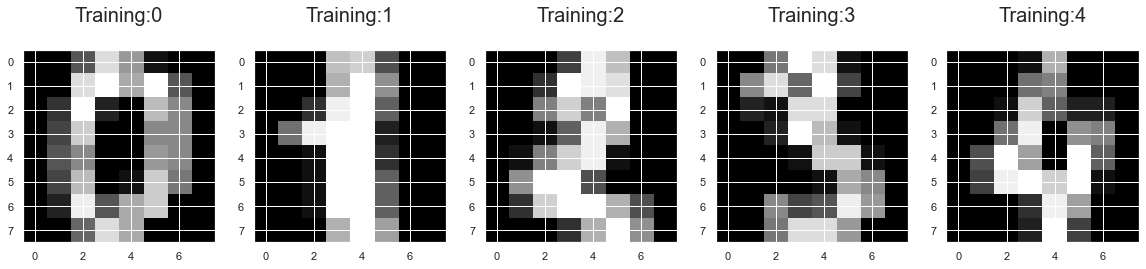

In [55]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index,(image,label) in enumerate (zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5, index +1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('Training:%i\n'% label,fontsize=20)

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test ,y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23,random_state=2)

In [57]:
print(x_train.shape)

(1383, 64)


In [58]:
print(y_train.shape)

(1383,)


In [59]:
print(x_test.shape)

(414, 64)


In [60]:
print(y_test.shape)

(414,)


In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
logisticRegr=LogisticRegression()
logisticRegr.fit(x_train,y_train)

C:\Users\beemu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
print(logisticRegr.predict(x_test[0].reshape(1,-1)))

[4]


In [64]:
logisticRegr.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [65]:
predictions=logisticRegr.predict(x_test)

In [66]:
score=logisticRegr.score(x_test,y_test)
print(score)

0.9516908212560387


# Using confusion Matrix to show Model Accuracy

In [67]:
cm=metrics.confusion_matrix(y_test,predictions)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


# Visualising confusion matrix using the heatmap

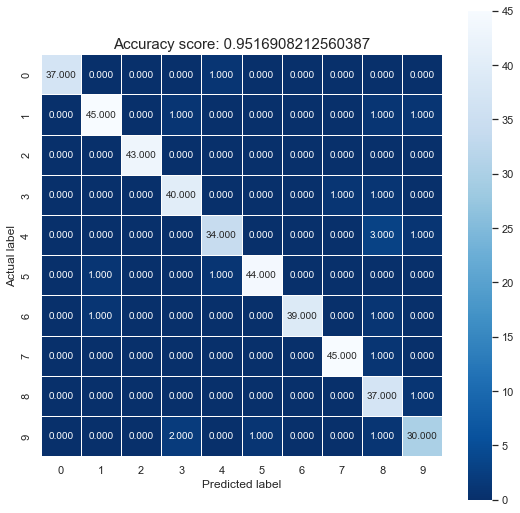

In [69]:
#the accuracy is 95%
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt=".3f" ,linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy score: {0}'.format(score)
plt.title (all_sample_title, size =15);

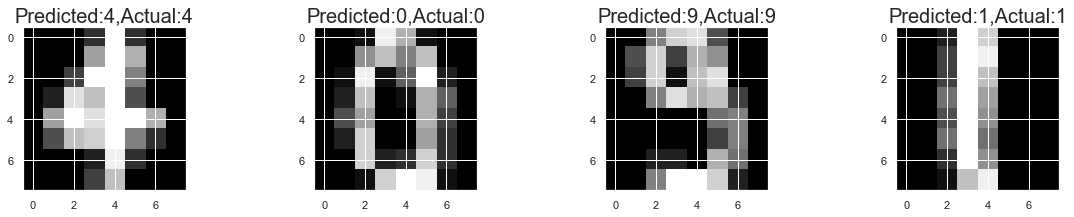

In [75]:
index =0
classifiedIndex=[]
for predict,actual in zip(predictions, y_test):
    if predict ==actual:
        classifiedIndex.append(index)
        index +=1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
            plt.subplot(1,4, plotIndex +1)
            plt.imshow(np.reshape(x_test[wrong],(8,8)),cmap=plt.cm.gray)
            plt.title("Predicted:{},Actual:{}".format(predictions[wrong],y_test[wrong]),fontsize=20)